In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from tqdm import tqdm

N = 10000

fname = f'Jaffe_10000_out_no_perturber.txt'

M = 1
m = M/N
Rs = 1
M_p = M/10

rho_0 = M / (4 * np.pi * (Rs)**3)

## Fetch the data

In [2]:
data = pd.read_csv(fname, names=list(range(7)), sep = ' ')

In [3]:
def dati (data,N,M_tot,M_p):
    
    x = []
    y = []
    z = []
    
    v_x = []
    v_y = []
    v_z = []
    
    start = N + 3
    step  = N * 3 + 3
    
    a = (np.array([data.iloc[i::step,:].copy() for i in range(start,start+N)]))
    for j in range(len(a)):
        temp = np.array([a[j][i][~np.isnan(a[j][i])] for i in range(len(a[j]))])
        
        x.append(temp[:,0])
        y.append(temp[:,1])
        z.append(temp[:,2])
        
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    
    
    b = (np.array([data.iloc[i::step,:].copy() for i in range(start+N,start+N*2)]))
    
    for j in range(len(b)):
        temp = np.array([b[j][i][~np.isnan(b[j][i])] for i in range(len(b[j]))])
        
        v_x.append(temp[:,0])
        v_y.append(temp[:,1])
        v_z.append(temp[:,2])
     

    v_x = np.array(v_x)
    v_y = np.array(v_y)
    v_z = np.array(v_z)
    
    #cm
    cm_x = []
    cm_y = []
    cm_z = []
    
    for i in range (len(x[0])):
        
        '''
        With the perturber
        cm_x.append(((np.sum(x.T[i,1:])*M_tot/N)+x.T[i,0]*M_p)/(M_tot+M_p))
        cm_y.append(((np.sum(y.T[i,1:])*M_tot/N)+y.T[i,0]*M_p)/(M_tot+M_p))
        cm_z.append(((np.sum(z.T[i,1:])*M_tot/N)+z.T[i,0]*M_p)/(M_tot+M_p))
        '''
        cm_x.append(((np.sum(x.T[i,0:])*M_tot)/N)/(M_tot+M_p))
        cm_y.append(((np.sum(y.T[i,0:])*M_tot)/N)/(M_tot+M_p))
        cm_z.append(((np.sum(z.T[i,0:])*M_tot)/N)/(M_tot+M_p))
        
    print('The final center of mass is (', cm_x[len(x[0])-1],', ', cm_y[len(x[0])-1],', ', cm_z[len(x[0])-1], ')')
    
    x = x - cm_x
    y = y - cm_y
    z = z - cm_z
    
    cm_v_x = []
    cm_v_y = []
    cm_v_z = []
    
    for i in range (len(x[0])):
        
        '''
        With the Perturber
        
        cm_v_x.append(((np.sum(v_x.T[i,1:])*M_tot/N)+v_x.T[i,0]*M_p)/(M_tot+M_p))
        cm_v_y.append(((np.sum(v_y.T[i,1:])*M_tot/N)+v_y.T[i,0]*M_p)/(M_tot+M_p))
        cm_v_z.append(((np.sum(v_z.T[i,1:])*M_tot/N)+v_z.T[i,0]*M_p)/(M_tot+M_p))
    
        '''
        
        cm_v_x.append(((np.sum(v_x.T[i,0:])*M_tot/N))/(M_tot))
        cm_v_y.append(((np.sum(v_y.T[i,0:])*M_tot/N))/(M_tot))
        cm_v_z.append(((np.sum(v_z.T[i,0:])*M_tot/N))/(M_tot))
    
    v_x = v_x - cm_v_x
    v_y = v_y - cm_v_y
    v_z = v_z - cm_v_z
    
    r = np.array([(x[i]**2+y[i]**2+z[i]**2)**0.5 for i in range(N)])
    
    t = (np.array(data.iloc[2::step,:].copy()))[:,2]
    
    return x,y,z,v_x,v_y,v_z,r,t

In [4]:
x,y,z,v_x,v_y,v_z,r,time = dati(data, N, M, M_p)

The final center of mass is ( -0.026407414125927304 ,  -0.005413506701078827 ,  0.02256548251465256 )


100%|█████████████████████████████████████████████| 8/8 [00:01<00:00,  4.27it/s]


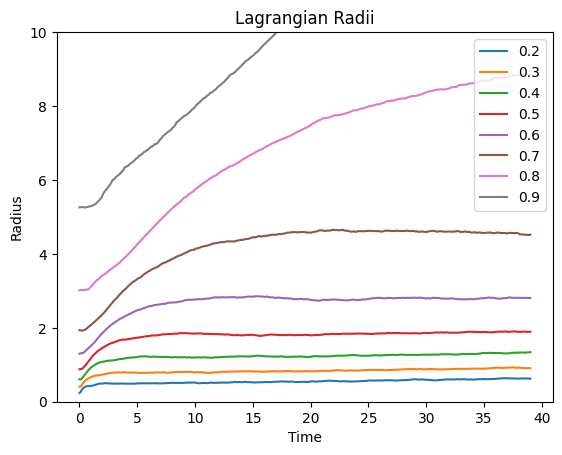

In [6]:
perc = [0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9]

for p in tqdm(perc):
    r_L = []
    for i in range(len(time)):
        a    = np.sort(r[1:,i])
        mask = a<np.quantile(a,p)
        r_L.append(np.max(a[mask]))
    #Plot it
    r_L = np.array(r_L)
    plt.plot(time,r_L, label=str(p))


'''for i in range(0, N, 100):
    plt.plot(time,r[i], alpha=0.1)
'''
plt.ylim(0,10)
plt.xlabel('Time')
plt.ylabel('Radius')
plt.title('Lagrangian Radii')
plt.legend()
plt.savefig(f'Plots/Lagrangian Radii {N}.png' )

In [7]:
len(time)

391

In [8]:
len(x[0])

391

100%|███████████████████████████████████| 10000/10000 [00:05<00:00, 1972.33it/s]


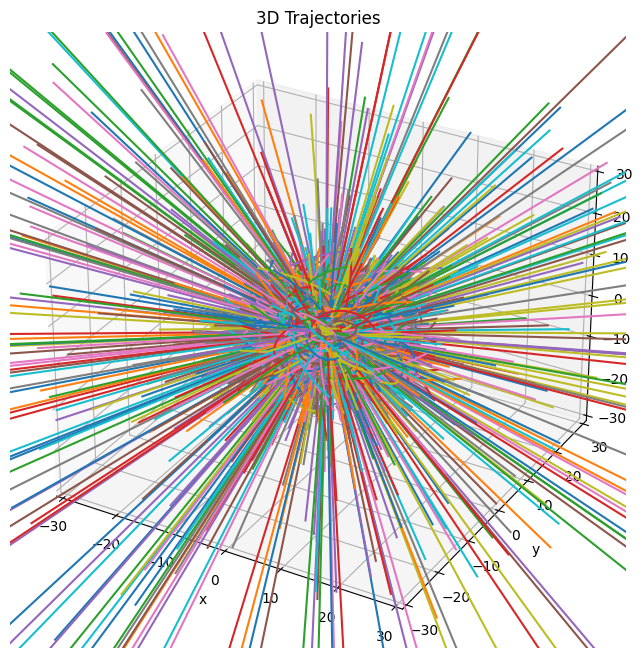

In [9]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,8))

for i in tqdm(range(0, N)):

    ax.plot(x[i, :], y[i, :], z[i, :], linestyle='-')

    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)

plt.title('3D Trajectories')
plt.show()

## Animation

100%|████████████████████████████████████████▉| 390/391 [00:13<00:00, 28.66it/s]

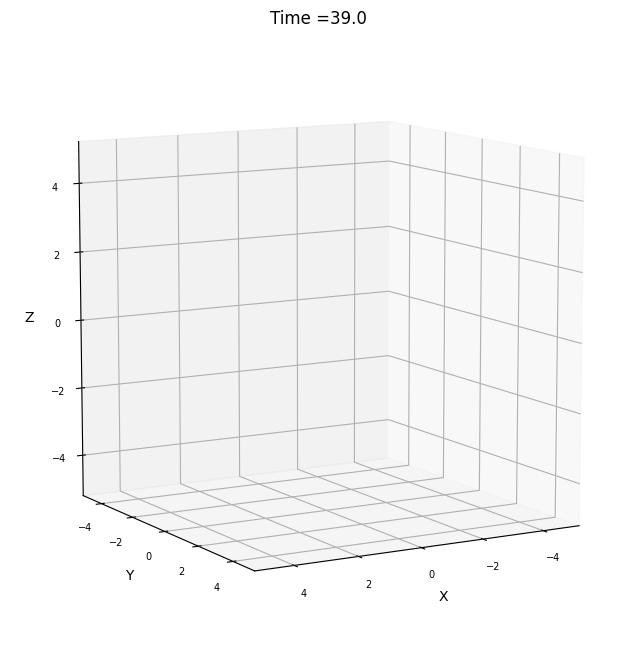

100%|████████████████████████████████████████▉| 390/391 [00:25<00:00, 28.66it/s]

In [10]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

#plot------------------------------------------------------------------------------

fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

ax.view_init(elev=10, azim=60)
ax.set_xlim(-5,+5)
ax.set_ylim(-5,+5)
ax.set_zlim(-5,+5)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.tick_params(axis='z', labelsize=7)


#animation--------------------------------------------------------------------------------
scatters, = ax.plot([], [], [], 'o', markersize='0.8', alpha=0.3)


def init():
    scatters.set_data([], [])
    scatters.set_3d_properties([])
    return scatters,

def animate_time(i): 
    scatters.set_data(x[:,i], y[:,i])
    scatters.set_3d_properties(z[:,i])
    ax.set_title('Time =' + str(np.round((np.array(time))[i])))
        
    return scatters,


num_frames = len(time)
animazione = FuncAnimation(fig, animate_time, frames=tqdm(range(len(time))), interval=100, init_func=init) #frames = num_frames interval =100

theta_ = np.linspace(0,2*np.pi,1000)

writergif = animation.PillowWriter(fps=10)
#writer = animation.PillowWriter(fps=30)
#animazione.save('plummer_sphere.gif', writer = 'ffmpeg', dpi=30)
animazione.save(f'Jaffe_{N}_test_no_pert.gif', writer = writergif)
#plt.show()

plt.rcParams['animation.html'] = 'html5'
#animazione

In [11]:
x_cm = np.zeros(len(time))
y_cm = np.zeros(len(time))
z_cm = np.zeros(len(time))

for i in tqdm(range(0,len(time))):
    x_cm[i] = np.mean(x[i])
    y_cm[i] = np.mean(y[i])
    z_cm[i] = np.mean(z[i])
    


100%|██████████████████████████████████████| 391/391 [00:00<00:00, 55453.20it/s]


Now I plot the trajectory of the center of mass of the system

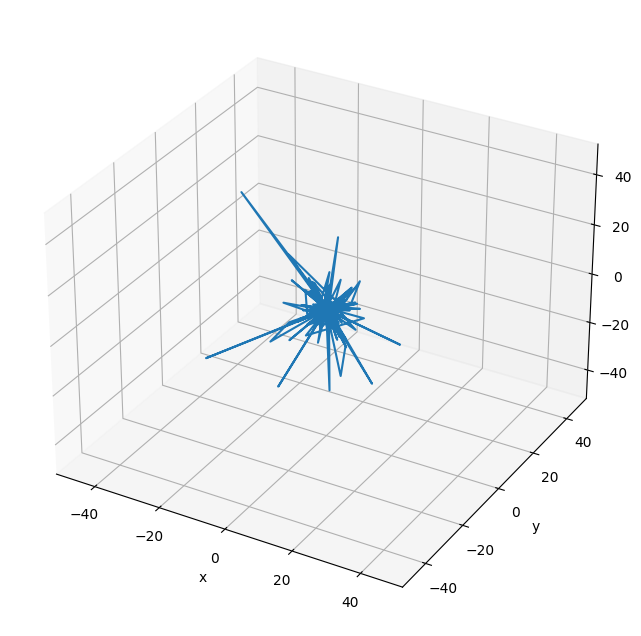

In [12]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,8))

ax.plot(x_cm, y_cm, z_cm, label=f"CM", linestyle='-')

    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_zlim(-50, 50)

plt.show()

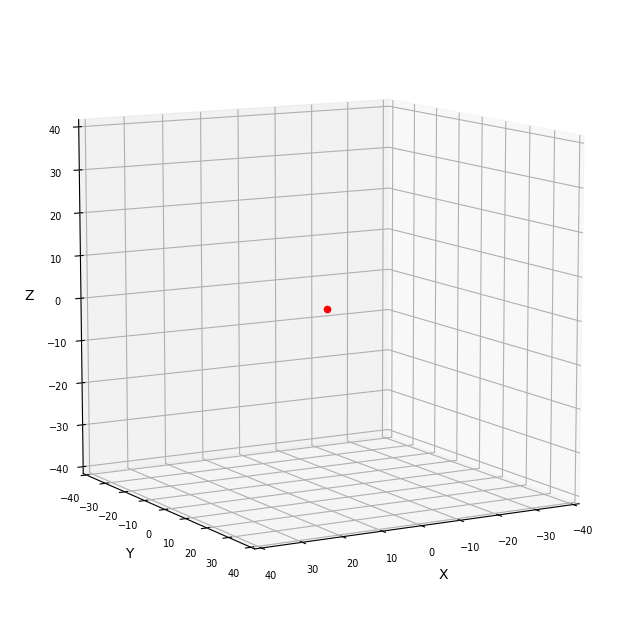

In [13]:
#plot------------------------------------------------------------------------------

fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

ax.view_init(elev=10, azim=60)
ax.set_xlim(-40, +40)
ax.set_ylim(-40, +40)
ax.set_zlim(-40, +40)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.tick_params(axis='z', labelsize=7)


#animation--------------------------------------------------------------------------------

# Initialize the plot with the initial center of mass position
scatter = ax.scatter([x_cm[0]], [y_cm[0]], [z_cm[0]], c='r', marker='o')

# Function to update the plot for each frame in the animation
def update(frame):
    scatter._offsets3d = ([x_cm[frame]], [y_cm[frame]], [z_cm[frame]])
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(time), interval=100, blit=True)

# Save the animation as a GIF
ani.save('center_of_mass_animation.gif', writer='pillow')

plt.show()

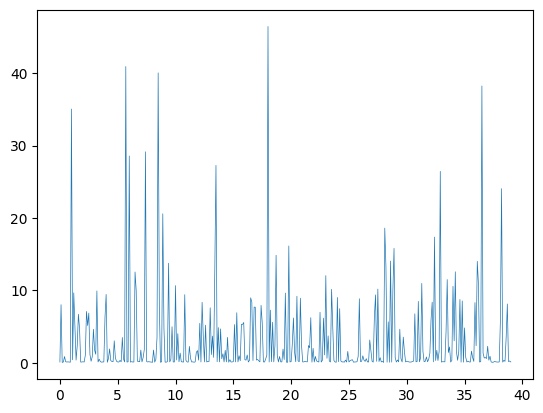

In [14]:
r_cm = np.sqrt(x_cm**2 + y_cm**2 + z_cm**2)
plt.plot(time, r_cm, linewidth=0.5)
plt.savefig('R CM')

# Raggi Lagrangiani Teorici

$$
    \frac{M(r)}{M(tot)} = \frac{r}{r + R_s}
$$



100%|█████████████████████████████████████████████| 8/8 [00:01<00:00,  4.34it/s]


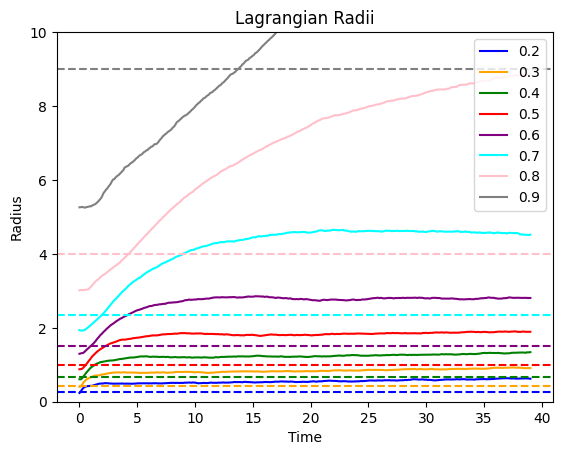

In [16]:
perc = [0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'pink', 'grey']

for p, c in tqdm(zip(perc, colors), total=len(perc)):
    r_L = []
    for i in range(len(time)):
        a    = np.sort(r[1:,i])
        mask = a<np.quantile(a,p)
        r_L.append(np.max(a[mask]))
    #Plot it
    r_L = np.array(r_L)
    R_teo = Rs * p / (1 - p)
    plt.plot(time,r_L, color=c, label=str(p))
    plt.axhline(y = R_teo, color=c, linestyle='--')


'''for i in range(0, N, 100):
    plt.plot(time,r[i], alpha=0.1)
'''
plt.ylim(0,10)
plt.xlabel('Time')
plt.ylabel('Radius')
plt.title('Lagrangian Radii')
plt.legend()
plt.savefig(f'Plots/Lagrangian Radii {N} teo.png' )